**Импорты**

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

import xgboost as xgb

**Загружаем датасет и смотрим на признаки**

In [123]:
data = pd.read_csv('spaceship_titanic.csv').dropna()
print(data.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


**Убираем неинформативные признаки и нормализуем**

In [124]:
data = data.drop(['PassengerId', 'Name'], axis=1)

categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 
                     'Destination', 'VIP', 'Transported']
numeric_features = ['Age', 'RoomService', 'FoodCourt', 
                    'ShoppingMall', 'Spa', 'VRDeck']

# Категориальные признаки
for feature in categorical_features:
    label_encoder = LabelEncoder()
    data[feature] = label_encoder.fit_transform(data[feature])

# Числовые признаки
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

print(data)

      HomePlanet  CryoSleep  Cabin  Destination       Age  VIP  RoomService  \
0              1          0    137            2  0.695413    0    -0.345756   
1              0          0   1823            2 -0.336769    0    -0.176748   
2              1          0      1            2  2.002842    1    -0.279083   
3              1          0      1            2  0.282540    0    -0.345756   
4              0          0   1825            2 -0.887266    0     0.124056   
...          ...        ...    ...          ...       ...  ...          ...   
8688           1          0    134            0  0.833037    1    -0.345756   
8689           0          1   4293            1 -0.749641    0    -0.345756   
8690           0          0   4298            2 -0.199145    0    -0.345756   
8691           1          0   1778            0  0.213728    0    -0.345756   
8692           1          0   1778            2  1.039473    0    -0.150389   

      FoodCourt  ShoppingMall       Spa    VRDeck  

**Разделим данные на train и test**

In [125]:
x = data.drop(['Transported'], axis=1)
y = data['Transported']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

**Построим дерево решений**

Accuracy: 0.7571860816944024


[Text(0.5, 0.9, 'x[1] <= 0.5\nlog_loss = 1.0\nsamples = 5284\nvalue = [2631, 2653]'),
 Text(0.25, 0.7, 'x[6] <= 0.205\nlog_loss = 0.916\nsamples = 3418\nvalue = [2285, 1133]'),
 Text(0.125, 0.5, 'x[9] <= 0.183\nlog_loss = 0.968\nsamples = 2537\nvalue = [1535, 1002]'),
 Text(0.0625, 0.3, 'x[10] <= -0.069\nlog_loss = 0.998\nsamples = 1879\nvalue = [985, 894]'),
 Text(0.03125, 0.1, 'log_loss = 0.973\nsamples = 1224\nvalue = [493, 731]'),
 Text(0.09375, 0.1, 'log_loss = 0.809\nsamples = 655\nvalue = [492, 163]'),
 Text(0.1875, 0.3, 'x[7] <= 0.556\nlog_loss = 0.644\nsamples = 658\nvalue = [550, 108]'),
 Text(0.15625, 0.1, 'log_loss = 0.484\nsamples = 506\nvalue = [453, 53]'),
 Text(0.21875, 0.1, 'log_loss = 0.944\nsamples = 152\nvalue = [97, 55]'),
 Text(0.375, 0.5, 'x[7] <= 1.07\nlog_loss = 0.607\nsamples = 881\nvalue = [750, 131]'),
 Text(0.3125, 0.3, 'x[8] <= 1.98\nlog_loss = 0.569\nsamples = 849\nvalue = [735, 114]'),
 Text(0.28125, 0.1, 'log_loss = 0.532\nsamples = 810\nvalue = [712, 9

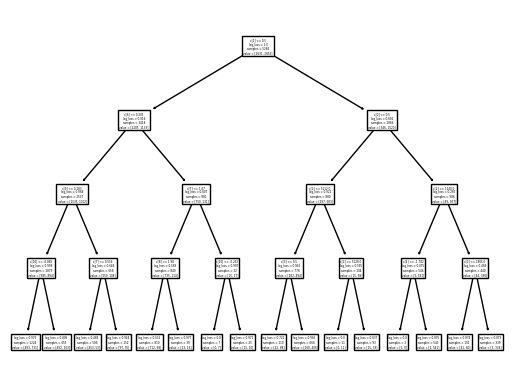

In [126]:
decision_tree = tree.DecisionTreeClassifier(criterion='log_loss', max_depth=4)
decision_tree.fit(x_train, y_train)

predict = decision_tree.predict(x_test)

print('Accuracy: {}'.format(accuracy_score(y_test, predict)))
tree.plot_tree(decision_tree)

**Применим метод градиентного бустинга**

In [127]:
xgb_model = xgb.XGBClassifier(n_estimators=7, max_depth=4)
xgb_model.fit(x_train, y_train)

predict = xgb_model.predict(x_test)

print('Accuracy: {}'.format(accuracy_score(y_test, predict)))

Accuracy: 0.7889561270801816


**Посмотрим на значимость переменных**

In [128]:
feature_importances = zip(x_train.columns, xgb_model.feature_importances_)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for feature, feature_importance in feature_importances:
    print('{}: {}'.format(feature, feature_importance))

CryoSleep: 0.5983852744102478
HomePlanet: 0.06524378806352615
RoomService: 0.06392748653888702
ShoppingMall: 0.0615491084754467
Spa: 0.05754537880420685
VRDeck: 0.05549348518252373
FoodCourt: 0.0446593314409256
Cabin: 0.02269783429801464
Age: 0.020862389355897903
Destination: 0.00963591132313013
VIP: 0.0


**Посмотрим на зависимость качества решения от глубины дерева**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......................max_depth=1;, score=0.798 total time=   0.0s
[CV 2/5] END .......................max_depth=1;, score=0.811 total time=   0.0s
[CV 3/5] END .......................max_depth=1;, score=0.772 total time=   0.0s
[CV 4/5] END .......................max_depth=1;, score=0.790 total time=   0.0s
[CV 5/5] END .......................max_depth=1;, score=0.801 total time=   0.0s
[CV 1/5] END .......................max_depth=2;, score=0.809 total time=   0.0s
[CV 2/5] END .......................max_depth=2;, score=0.822 total time=   0.0s
[CV 3/5] END .......................max_depth=2;, score=0.776 total time=   0.0s
[CV 4/5] END .......................max_depth=2;, score=0.790 total time=   0.0s
[CV 5/5] END .......................max_depth=2;, score=0.808 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.800 total time=   0.0s
[CV 2/5] END .......................max_depth=3;

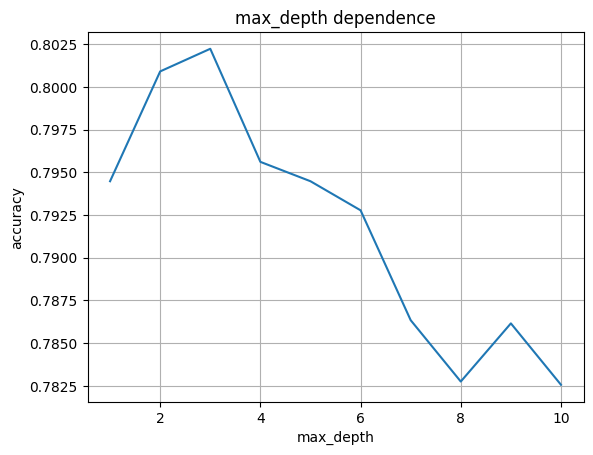

In [129]:
param_grid = {
    'max_depth': [i for i in range(1, 11)]
}

xgb_model = xgb.XGBClassifier()
xgb_grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', verbose=4)
xgb_grid_search.fit(x_train, y_train)

plt.title('max_depth dependence')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.grid(True)
plt.plot(param_grid['max_depth'], xgb_grid_search.cv_results_['mean_test_score'])

**Теперь от глубины деревьев и от их количества**

In [130]:
param_grid = {
    'max_depth': [i for i in range(1, 7)],
    'n_estimators': [10, 50, 100, 200, 400]
}

xgb_model = xgb.XGBClassifier()
xgb_grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', verbose=4)
xgb_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ......max_depth=1, n_estimators=10;, score=0.703 total time=   0.0s
[CV 2/5] END ......max_depth=1, n_estimators=10;, score=0.737 total time=   0.0s
[CV 3/5] END ......max_depth=1, n_estimators=10;, score=0.762 total time=   0.0s
[CV 4/5] END ......max_depth=1, n_estimators=10;, score=0.735 total time=   0.0s
[CV 5/5] END ......max_depth=1, n_estimators=10;, score=0.771 total time=   0.0s
[CV 1/5] END ......max_depth=1, n_estimators=50;, score=0.788 total time=   0.0s
[CV 2/5] END ......max_depth=1, n_estimators=50;, score=0.799 total time=   0.0s
[CV 3/5] END ......max_depth=1, n_estimators=50;, score=0.767 total time=   0.0s
[CV 4/5] END ......max_depth=1, n_estimators=50;, score=0.783 total time=   0.0s
[CV 5/5] END ......max_depth=1, n_estimators=50;, score=0.795 total time=   0.0s
[CV 1/5] END .....max_depth=1, n_estimators=100;, score=0.798 total time=   0.0s
[CV 2/5] END .....max_depth=1, n_estimators=100

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [10, 50, 100, 200, 400]},
             scoring='accuracy', verbose=4)

**Посмотрим на параметры, дающие лучший результат**

In [131]:
print('Best params: ', xgb_grid_search.best_params_)
print('Best score: ', xgb_grid_search.best_score_)

Best params:  {'max_depth': 3, 'n_estimators': 100}
Best score:  0.8022349201571057


**Визуализируем результат**

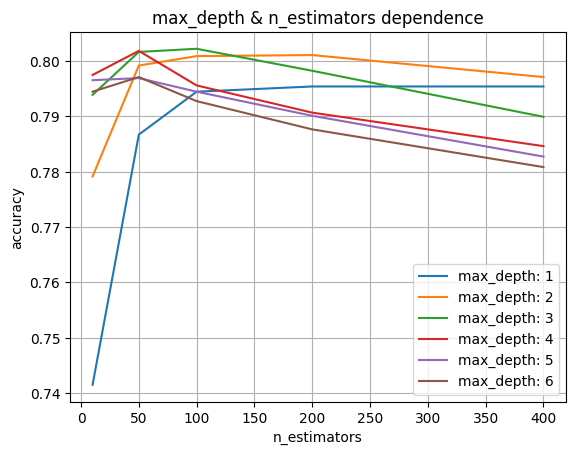

In [132]:
number_of_params = len(param_grid['n_estimators'])

plt.title('max_depth & n_estimators dependence')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.grid(True)
for i, n in enumerate(param_grid['max_depth']):
  current_position = i * number_of_params
  plt.plot(param_grid['n_estimators'], 
           xgb_grid_search.cv_results_['mean_test_score'][current_position: current_position + number_of_params],
           label='max_depth: {}'.format(n))
plt.legend()

**Проделаем все то же самое для случайного леса**

In [133]:
param_grid = {
    'max_depth': [i for i in range(1, 7)],
    'n_estimators': [10, 50, 100, 200, 400]
}

random_forest_model = RandomForestClassifier()
random_forest_grid_search = GridSearchCV(random_forest_model, param_grid, 
                                         cv=5, scoring='accuracy', verbose=4)
random_forest_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ......max_depth=1, n_estimators=10;, score=0.727 total time=   0.0s
[CV 2/5] END ......max_depth=1, n_estimators=10;, score=0.700 total time=   0.0s
[CV 3/5] END ......max_depth=1, n_estimators=10;, score=0.746 total time=   0.0s
[CV 4/5] END ......max_depth=1, n_estimators=10;, score=0.700 total time=   0.0s
[CV 5/5] END ......max_depth=1, n_estimators=10;, score=0.734 total time=   0.0s
[CV 1/5] END ......max_depth=1, n_estimators=50;, score=0.723 total time=   0.0s
[CV 2/5] END ......max_depth=1, n_estimators=50;, score=0.755 total time=   0.0s
[CV 3/5] END ......max_depth=1, n_estimators=50;, score=0.749 total time=   0.0s
[CV 4/5] END ......max_depth=1, n_estimators=50;, score=0.718 total time=   0.0s
[CV 5/5] END ......max_depth=1, n_estimators=50;, score=0.741 total time=   0.0s
[CV 1/5] END .....max_depth=1, n_estimators=100;, score=0.724 total time=   0.0s
[CV 2/5] END .....max_depth=1, n_estimators=100

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [10, 50, 100, 200, 400]},
             scoring='accuracy', verbose=4)

In [134]:
print('Best params: ', random_forest_grid_search.best_params_)
print('Best score: ', random_forest_grid_search.best_score_)

Best params:  {'max_depth': 6, 'n_estimators': 50}
Best score:  0.7925817422092256


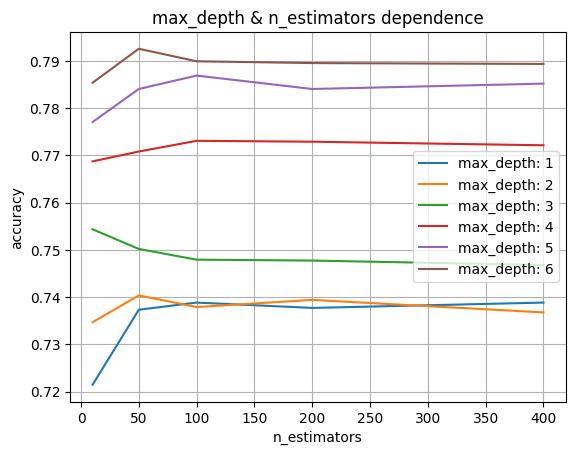

In [135]:
number_of_params = len(param_grid['n_estimators'])

plt.title('max_depth & n_estimators dependence')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.grid(True)
for i, n in enumerate(param_grid['max_depth']):
  current_position = i * number_of_params
  plt.plot(param_grid['n_estimators'], 
           random_forest_grid_search.cv_results_['mean_test_score'][current_position: current_position + number_of_params],
           label='max_depth: {}'.format(n))
plt.legend()